In [4]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import csv
import numpy as np
%matplotlib inline

In [16]:
# Reading Shape File to make map of the USA
map = gpd.read_file(r"C:\Users\Evan\Desktop\US Farm Stand\states_21basic\states.shp")

In [17]:
# Reading CSV for data of farmer's market with latitude/longitude locations
df = pd.read_csv(r"C:\Users\Evan\Desktop\US Farm Stand\Export.csv")
crs = {'init': 'espg:4326'}

In [18]:
# Outputting the Number of Farmer's Markets 
file = open(r"C:\Users\Evan\Desktop\US Farm Stand\Export.csv")
reader = csv.reader(file)
value = len(list(reader))
print('Number of Farmers Markets plotted on this map: ' + str(value))

# Conversion of latitude/longtitude into "Point" for GeoDataFrame
geometry = [Point(xy) for xy in zip(df["x"], df["y"])]

# Naming geo_df as GeoDataFrame
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

# Excluding Hawaii, Alaska, and US territories from the GeoDataFrame
geo_df = geo_df[~geo_df.State.isin(['Hawaii', 'Alaska', 'Puerto Rico', 'Virgin Islands'])]

# Limiting to only Texas, overrides one above
geo_df = geo_df[geo_df.State.isin(['Texas'])]

# Counting the number of Farmer's Markets per state
print("Number of cities in this state:")
geo_df['State'].value_counts()


Number of Farmers Markets plotted on this map: 8760
Number of cities in this state:


Texas    226
Name: State, dtype: int64

In [19]:
# Reading CSV for cities in the USA
cities = pd.read_csv(r"C:\Users\Evan\Desktop\US Farm Stand\Cities.csv")
crs = {'init': 'espg:4326'}

# Conversion of latitude/longtitude into "Point" for GeoDataFrame; X is longitude, Y is latitude
geometry = [Point(xy) for xy in zip(cities["Longitude"], cities["Latitude"])]

# Naming cities_df as GeoDataFrame
cities_df = gpd.GeoDataFrame(cities, crs = crs, geometry = geometry)
#cities_df = cities_df[~cities_df.StateAbbr.isin(['HI', 'AK'])] 
cities_df = cities_df[cities_df.StateAbbr.isin(['TX'])]   # only for state of Texas


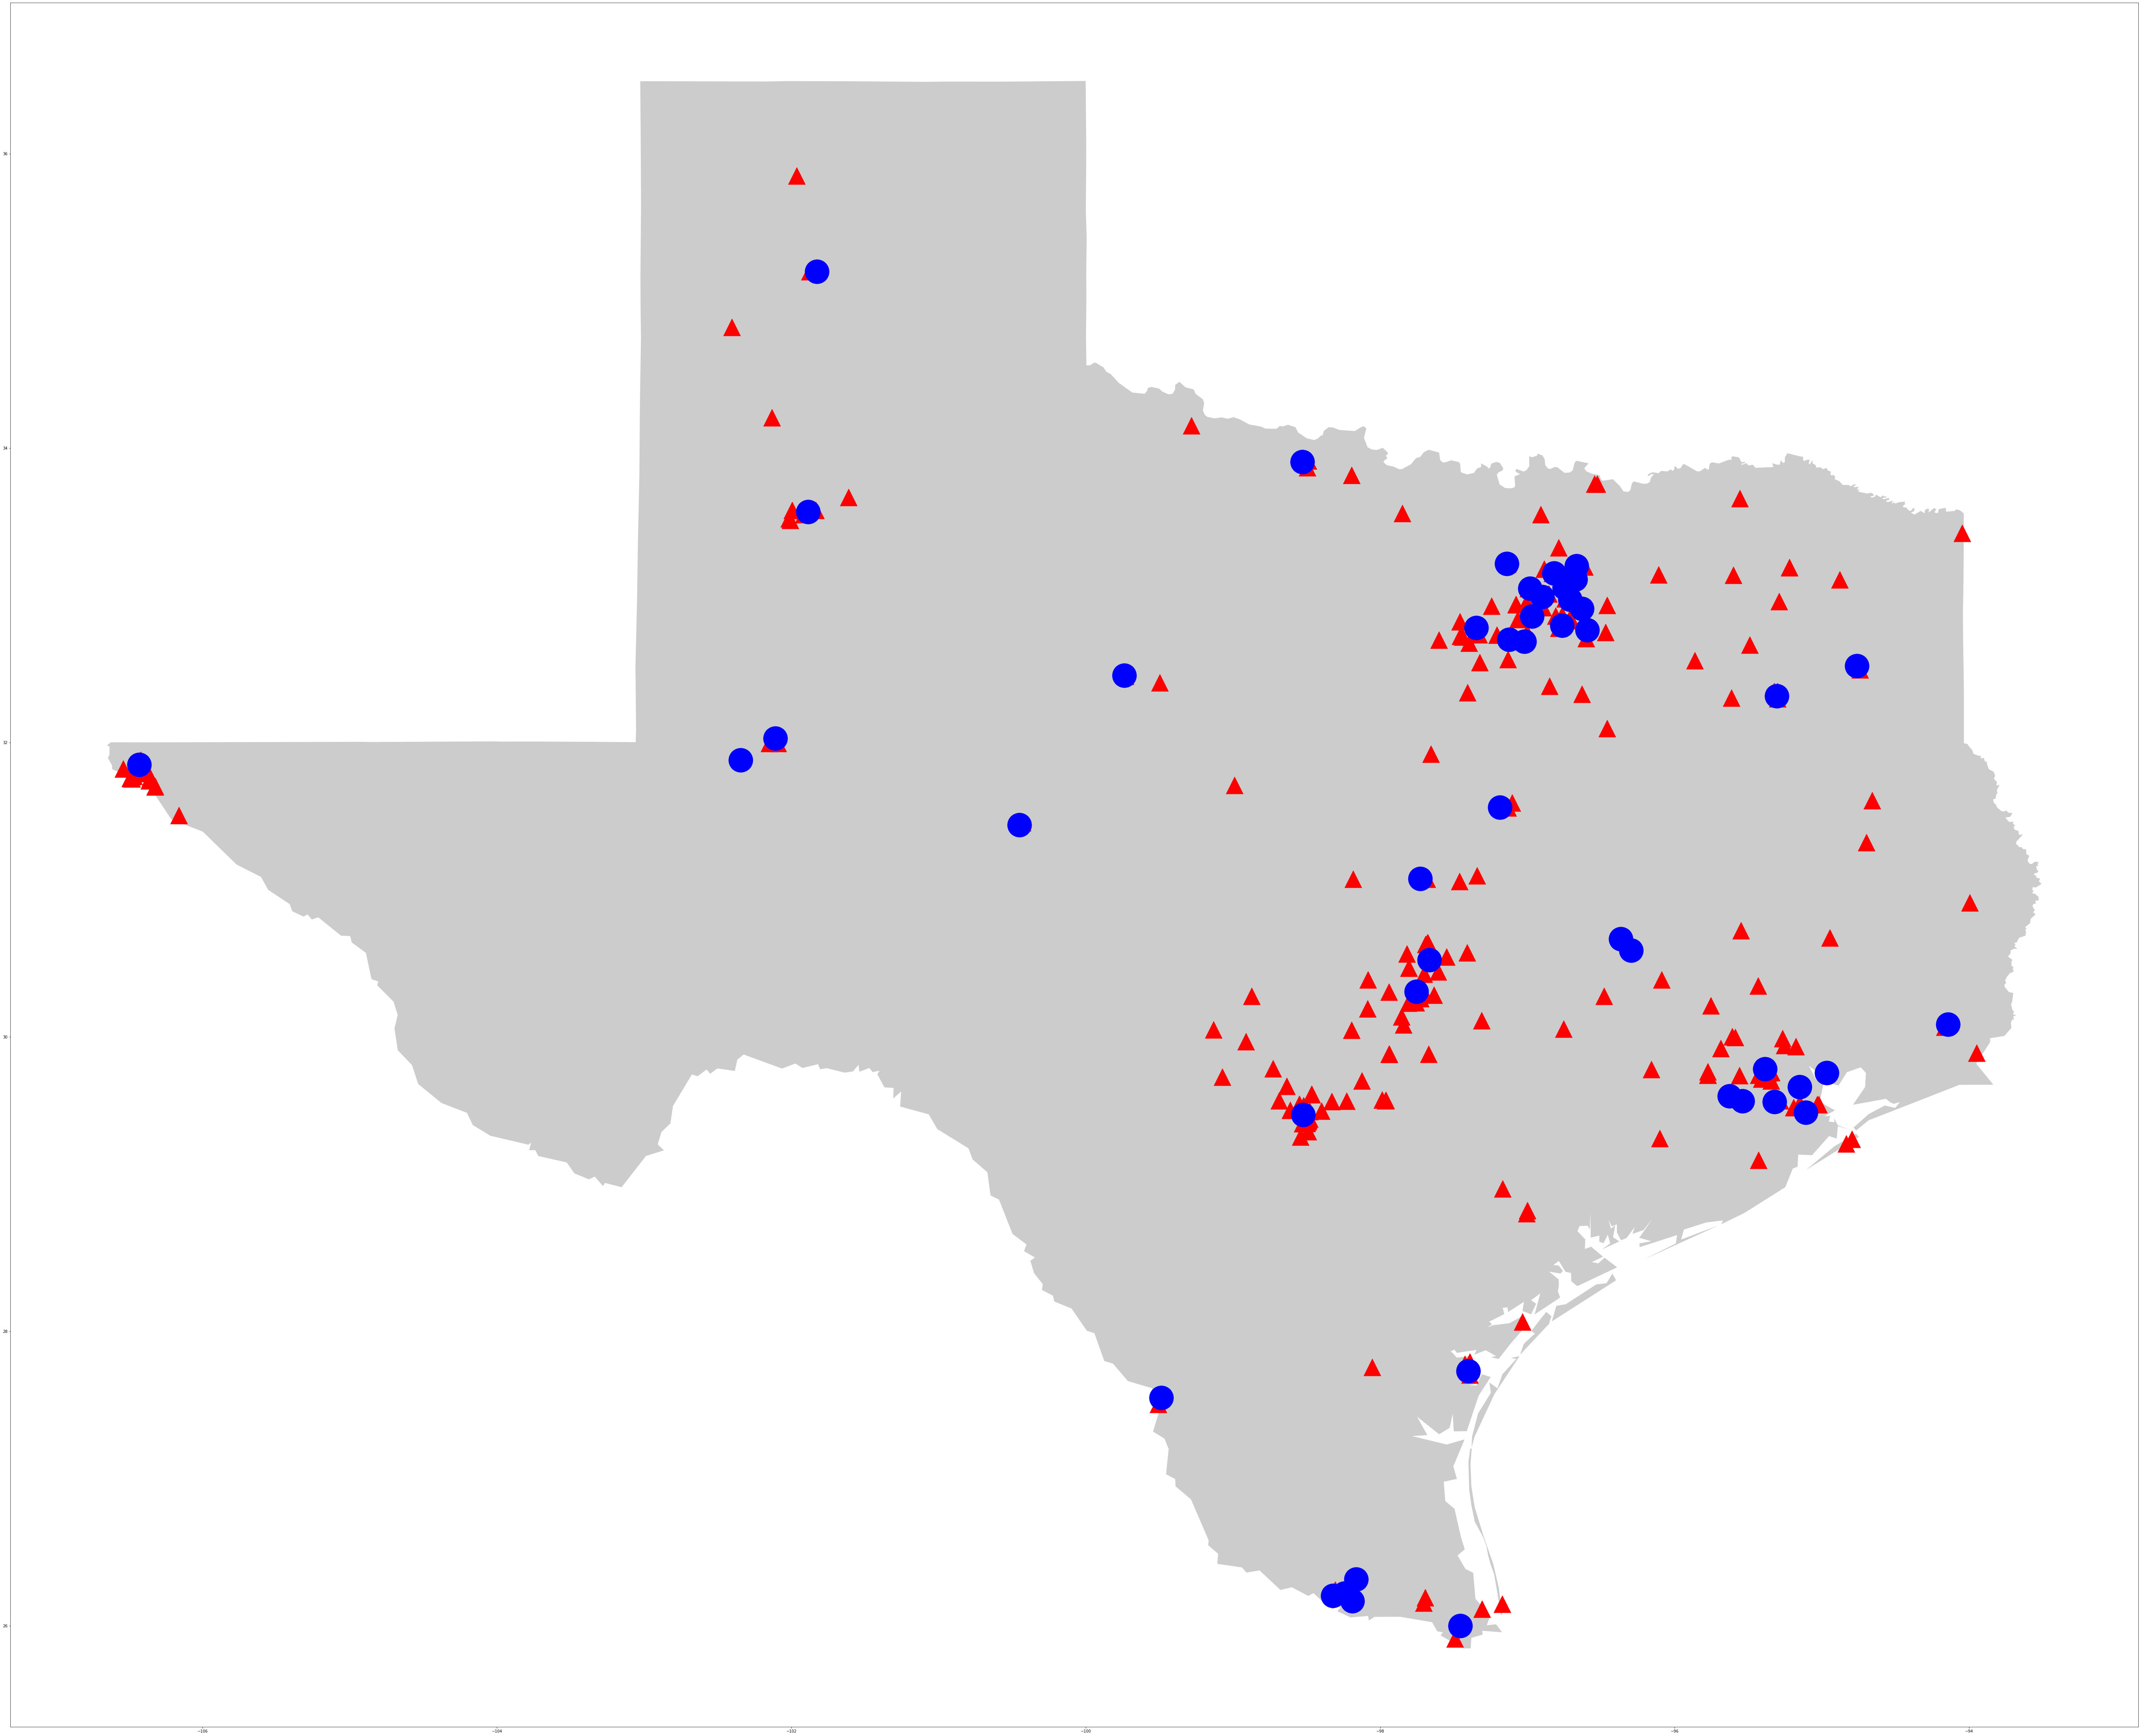

In [20]:
# no idea what this does lol
fig,ax = plt.subplots(figsize = (100,100))

# Plotting the States (grey background)
#map.plot(ax = ax, alpha = 0.4, color = "grey")
map[map.STATE_ABBR == 'TX'].plot(ax = ax, alpha = 0.4, color = "grey")

# Displaying the Farmer's Market Locations on the map
geo_df.plot(ax = ax, markersize = 2000, color = "red", marker = "^")

# Displaying the Cities on the map
cities_df.plot(ax = ax, markersize = 4000, color = "blue", marker = "o")


In [21]:
cx_list = []
cy_list = []

for i in range(len(cities_df["Longitude"])):
    c_x = cities_df["Longitude"].iloc[i]
    c_y = cities_df["Latitude"].iloc[i]
    cx_list.append(c_x)
    cy_list.append(c_y)





fx_list = []
fy_list = []

for i in range(len(geo_df["x"])):
    f_x = geo_df["x"].iloc[i]
    f_y = geo_df["y"].iloc[i]
    fx_list.append(f_x)
    fy_list.append(f_y)


In [25]:
import math
import numpy as np

short_d = []
count = 0

larger = 0
smaller = 0

if len(fx_list)>len(cx_list):
    larger = len(fx_list)
    smaller = len(cx_list)
else:
    larger = len(cx_list)
    smaller = len(fx_list)


for i in range(larger):
    shortest = 100000000
    for j in range(smaller):
        
        dlon = math.radians(fx_list[i] - cx_list[j])
        dlat = math.radians(fy_list[i] - cy_list[j])
        
        R = 3961 #radius of Earth in miles
        a = (math.sin(dlat/2))**2 + np.cos(math.radians(cy_list[j])) * np.cos(math.radians(fy_list[i])) * (np.sin((dlon/2)))**2 
        c = 2 * math.atan2( math.sqrt(a), math.sqrt(1-a) ) 
        d = np.float(R * c)
        
        if d < shortest:
            shortest = d
            
    if shortest < 100000000:
        short_d.append(shortest)
        count = count + 1
        
print(count)

sum = 0

for x in short_d:
    sum = sum + x

print(sum)
print(sum/count)

print("The average mean to a farmer's market from a city is " + str(np.mean(short_d)) + " miles")     


226
3721.667709056201
16.46755623476195
The average mean to a farmer's market from a city is 16.46755623476195 miles
